In [20]:
import pandas as pd

# Load the dataset
file_path = "hashtag_joebiden.csv"  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Check the first few rows
print(df.head())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6788\733774248.py:5: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri A. 🇺🇸   
2     Twitter Web App           

In [6]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define the preprocessing function
def preprocess_text(text):
    try:
        # Ensure the input is a string
        if not isinstance(text, str):
            text = str(text)
        
        # Remove URLs, mentions, and hashtags
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
        text = re.sub(r"@\w+|#\w+", "", text)
        
        # Remove special characters and numbers
        text = re.sub(r"[^A-Za-z\s]", "", text)
        
        # Convert to lowercase
        text = text.lower()
        
        # Tokenize and remove stopwords
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words("english")]
        
        return " ".join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}, Error: {e}")
        return ""

# Load the dataset
file_path = "hashtag_joebiden.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Check if 'tweet' column exists
if 'tweet' in df.columns:
    print("Column 'tweet' found!")
    # Fill NaN values with empty strings
    df['tweet'] = df['tweet'].fillna("")
else:
    raise ValueError("Column 'tweet' not found in the dataset!")

# Apply preprocessing
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Display a sample of original and cleaned tweets
print(df[['tweet', 'cleaned_tweet']].head())

# Save the cleaned data to a new CSV file
df.to_csv("cleaned_hashtag_joebiden.csv", index=False)
print("Cleaned dataset saved as 'cleaned_hashtag_joebiden.csv'.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6788\2304856731.py:39: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Column 'tweet' found!
                                               tweet  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   
3  @chrislongview Watching and setting dvr. Let’s...   
4  #censorship #HunterBiden #Biden #BidenEmails #...   

                                       cleaned_tweet  
0  en dice que solo se preocupa por l mismo el de...  
1                                                     
2                                               made  
3       watching setting dvr lets give bonus ratings  
4                                                     
Cleaned dataset saved as 'cleaned_hashtag_joebiden.csv'.


In [7]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Sentiment analysis functions
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

def vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply TextBlob
df['polarity'], df['subjectivity'] = zip(*df['cleaned_tweet'].apply(textblob_sentiment))

# Apply VADER
df['vader_score'] = df['cleaned_tweet'].apply(vader_sentiment)

print(df[['cleaned_tweet', 'polarity', 'subjectivity', 'vader_score']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


                                       cleaned_tweet  polarity  subjectivity  \
0  en dice que solo se preocupa por l mismo el de...       0.0           0.0   
1                                                          0.0           0.0   
2                                               made       0.0           0.0   
3       watching setting dvr lets give bonus ratings       0.0           0.0   
4                                                          0.0           0.0   

   vader_score  
0       0.0000  
1       0.0000  
2       0.0000  
3       0.5423  
4       0.0000  


In [7]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv("cleaned_hashtag_joebiden.csv")

# Check the first few rows to confirm it loaded correctly
print(df.head())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8692\3540620795.py:4: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_hashtag_joebiden.csv")


            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

               source                user_id           user_name  \
0           TweetDeck            360666534.0  El Sol Latino News   
1    Twitter for iPad            809904438.0         Cheri A. 🇺🇸   
2     Twitter Web App           

In [17]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Sentiment analysis functions
def textblob_sentiment(text):
    # Ensure the text is a string (handle NaN or float cases)
    text = str(text)
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

def vader_sentiment(text):
    # Ensure the text is a string (handle NaN or float cases)
    text = str(text)
    score = sia.polarity_scores(text)
    return score['compound']

# Apply TextBlob sentiment analysis (Handle NaN by converting to empty string)
df['polarity'], df['subjectivity'] = zip(*df['cleaned_tweet'].apply(lambda x: textblob_sentiment(str(x) if pd.notna(x) else "")))

# Apply VADER sentiment analysis (Handle NaN by converting to empty string)
df['vader_score'] = df['cleaned_tweet'].apply(lambda x: vader_sentiment(str(x) if pd.notna(x) else ""))

# Show the result
print(df[['cleaned_tweet', 'polarity', 'subjectivity', 'vader_score']].head())

# Save the DataFrame back into the same file
df.to_csv("cleaned_hashtag_joebiden.csv", index=False)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                       cleaned_tweet  polarity  subjectivity  \
0  en dice que solo se preocupa por l mismo el de...       0.0           0.0   
1                                                NaN       0.0           0.0   
2                                               made       0.0           0.0   
3       watching setting dvr lets give bonus ratings       0.0           0.0   
4                                                NaN       0.0           0.0   

   vader_score  
0       0.0000  
1       0.0000  
2       0.0000  
3       0.5423  
4       0.0000  


In [8]:
from transformers import pipeline

# Initialize the Hugging Face pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the model
df['transformer_sentiment'] = df['cleaned_tweet'].apply(lambda x: sentiment_pipeline(str(x))[0]['label'] if pd.notna(x) else None)

# Display results
print(df[['cleaned_tweet', 'transformer_sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                       cleaned_tweet transformer_sentiment
0  en dice que solo se preocupa por l mismo el de...              NEGATIVE
1                                                NaN                  None
2                                               made              POSITIVE
3       watching setting dvr lets give bonus ratings              POSITIVE
4                                                NaN                  None


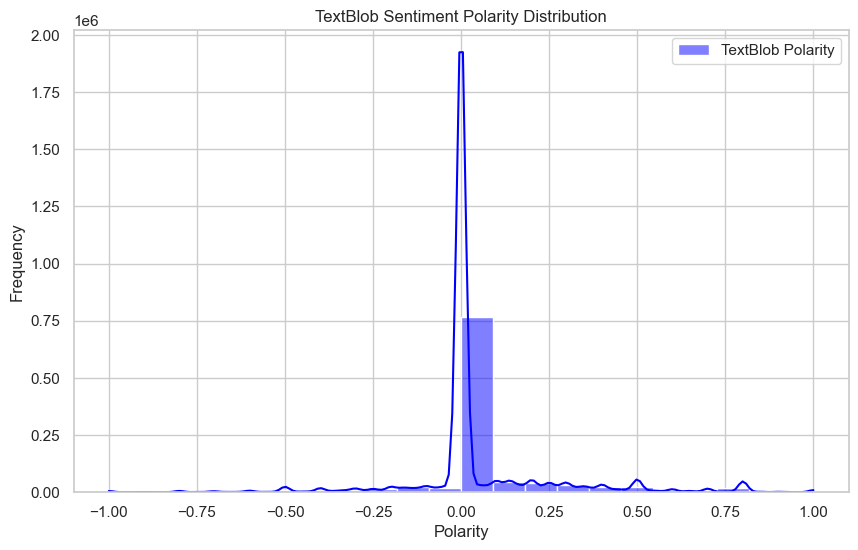

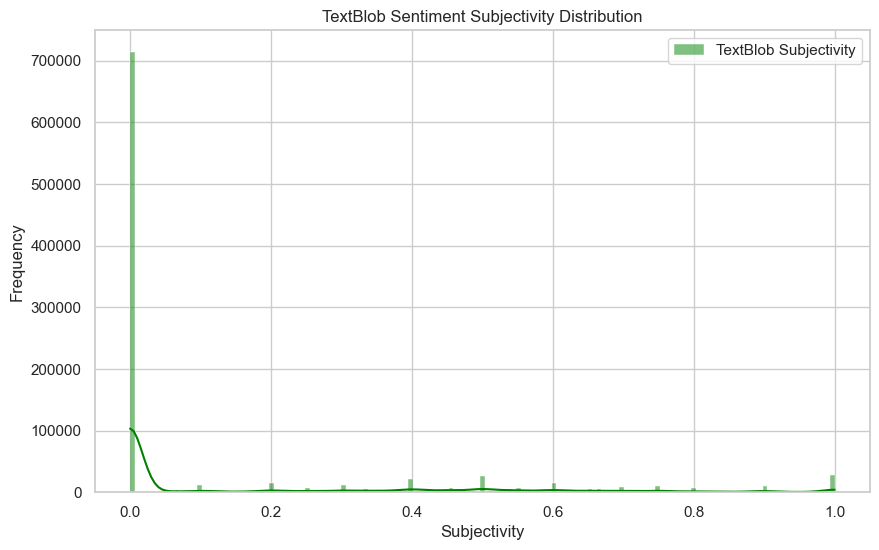

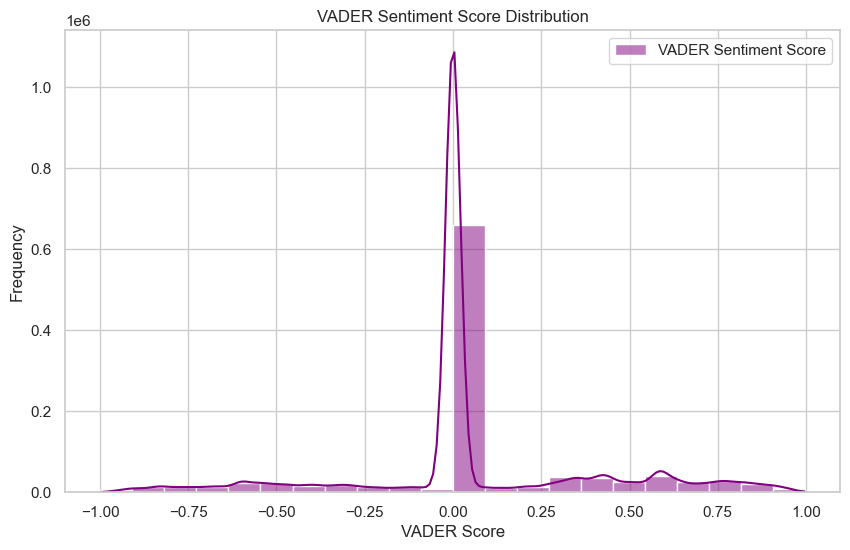

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8692\1052623152.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='transformer_sentiment', data=df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8692\1052623152.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = sentiment_counts[i]


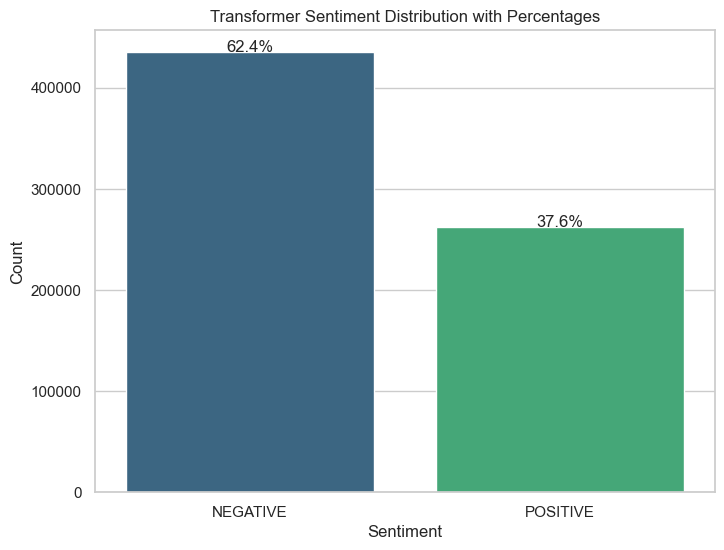

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations for better aesthetics
sns.set(style="whitegrid")

# Distribution of polarity (TextBlob)
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], kde=True, color='blue', label='TextBlob Polarity')
plt.legend()
plt.title('TextBlob Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Distribution of subjectivity (TextBlob)
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], kde=True, color='green', label='TextBlob Subjectivity')
plt.legend()
plt.title('TextBlob Sentiment Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

# Distribution of VADER scores
plt.figure(figsize=(10, 6))
sns.histplot(df['vader_score'], kde=True, color='purple', label='VADER Sentiment Score')
plt.legend()
plt.title('VADER Sentiment Score Distribution')
plt.xlabel('VADER Score')
plt.ylabel('Frequency')
plt.show()

# Transformer Sentiment Distribution with Percentages
plt.figure(figsize=(8, 6))

# Calculate percentages for each sentiment
sentiment_counts = df['transformer_sentiment'].value_counts(normalize=True) * 100

# Create a count plot
ax = sns.countplot(x='transformer_sentiment', data=df, palette='viridis')

# Annotate with percentages
for i, count in enumerate(df['transformer_sentiment'].value_counts()):
    percentage = sentiment_counts[i]
    ax.text(i, count + 5, f"{percentage:.1f}%", ha='center', fontsize=12)

# Final plot adjustments
plt.title('Transformer Sentiment Distribution with Percentages')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [21]:
output_file = "new_sentiment_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}.")


Results saved to new_sentiment_analysis_results.csv.
